# Model test: single trigger word

## Results



TODO: Report and discuss model results

## Initialization

In [1]:
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import IPython
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import util_test as utt
import dataset as ds
import util_model as um

/home/luca/anaconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload
%autoreload 2

## Loading the dataset

In [3]:
ds_folder = "../datasets/command/3"
meta = ds.load_dataset_metadata(ds_folder)
print(meta)

{'class_dirs': ['raw-dataset/words/not-vlc', 'raw-dataset/words/back', 'raw-dataset/words/close', 'raw-dataset/words/fullscreen', 'raw-dataset/words/next', 'raw-dataset/words/pause', 'raw-dataset/words/play', 'raw-dataset/words/prev', 'raw-dataset/words/volume-down', 'raw-dataset/words/volume-up'], 'background_dir': 'raw-dataset/backgrounds/1', 'class_labels': ['not-vlc', 'back', 'close', 'fullscreen', 'next', 'pause', 'play', 'prev', 'volume-down', 'volume-up'], 'n_classes': 10, 'n_samples': 10000, 'is_neg_class': True, 'create_global_feat': True, 'n_samples_per_training_split': 1024, 'n_training_samples': 7000, 'n_training_files': 7}


In [6]:
train_feeder = ds.BatchFeeder(n_samples=7000, n_files=7, n_sample_per_file=1024, batch_size=32, ds_folder=ds_folder, base_file_name='train', no_target=True)
Y_train = train_feeder.get_target()
X_dev, Y_dev = ds.load_single_dataset(os.path.join(ds_folder,"dev.npz"))

## Training history

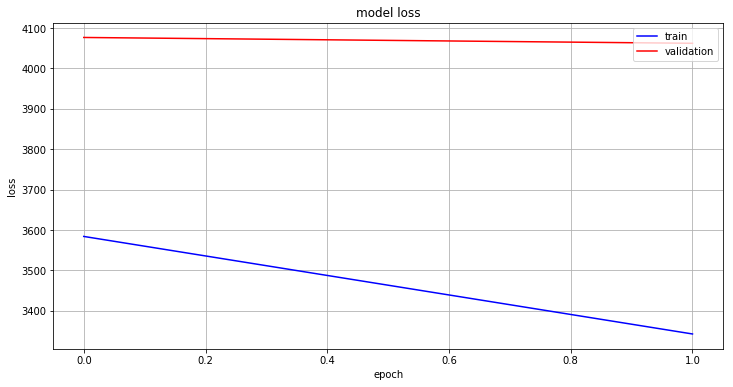

In [4]:
model_folder = '../models/model_command_3'
h = um.TrainingHistory(model_folder)
h.plot()

## Loading the model

In [13]:
epoch = 2
model = um.load_model(model_folder,epoch)

## Global custom metrics

In [14]:
print("Predicting on training set")
Yp_train = model.predict_generator(train_feeder, max_queue_size=4, workers=1, use_multiprocessing=True)
print(Yp_train.shape,"\n")
print("Predicting on validation set")
Yp_dev = model.predict(X_dev)
print(Yp_dev.shape)

Predicting on training set
(6976, 1181, 10) 

Predicting on validation set
(1500, 1181, 10)


In [15]:
print("Training set metrics")
mt1, mt2 = utt.compute_global_metrics_multi(Y_train, Yp_train)
print(mt1)
print("\nValidation set metrics")
md1, md2 = utt.compute_global_metrics_multi(Y_dev, Yp_dev)
print(md1)

Training set metrics
{'precision': 0.8988825292995366, 'recall': 0.8792322047454012, 'f1_score': 0.8889487870619946, '_tp': 13192, '_fbn': 1793, '_fpb': 1465, '_fc': 19}

Validation set metrics
{'precision': 0.8985736925515055, 'recall': 0.8733826247689463, 'f1_score': 0.8857990938915793, '_tp': 2835, '_fbn': 406, '_fpb': 315, '_fc': 5}


## Plotting random samples from training set

### True positives

Sample: 5851


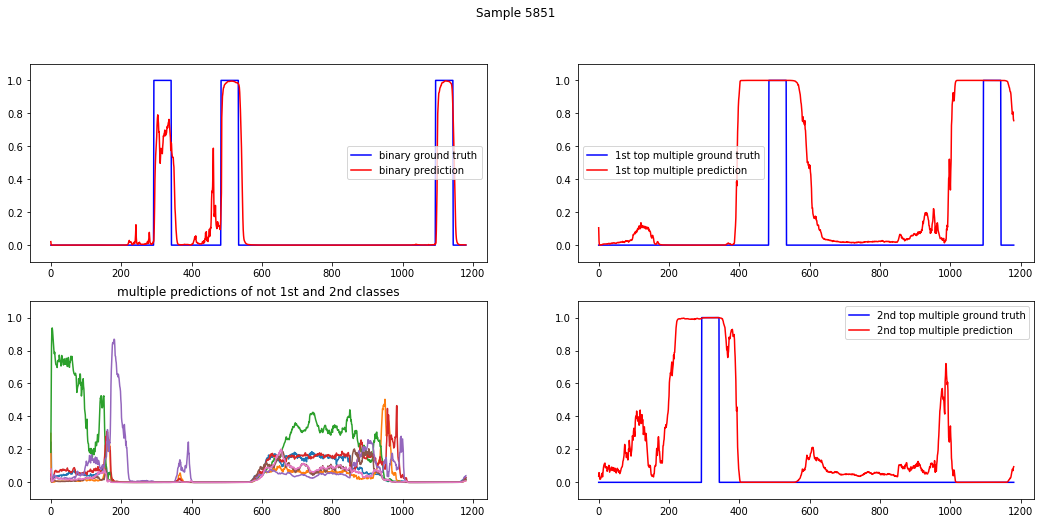

Sample: 5654


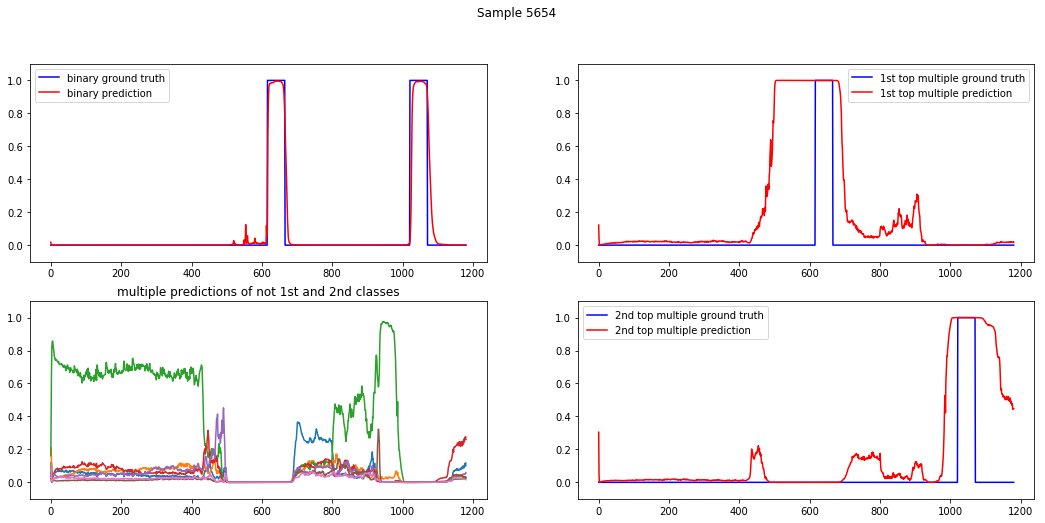

Sample: 794


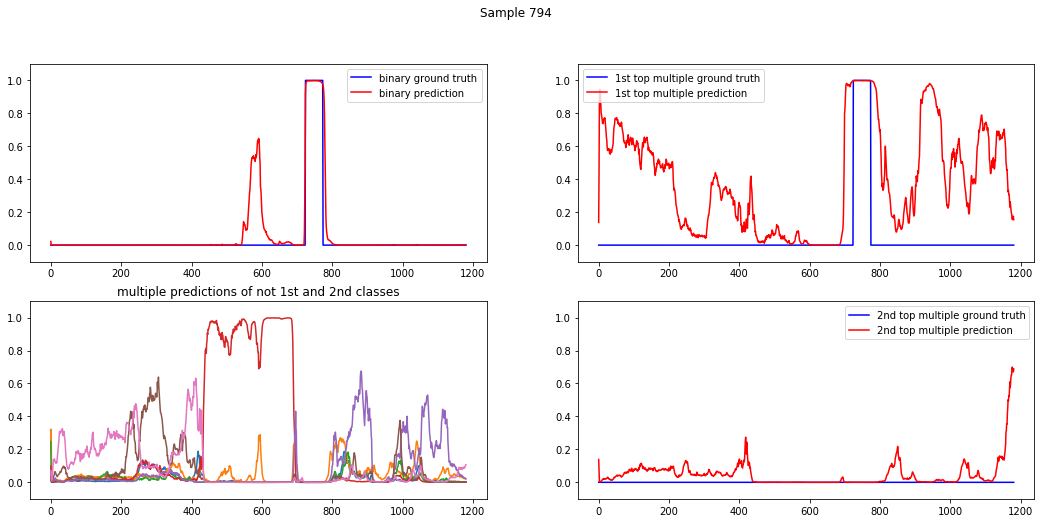

Sample: 4932


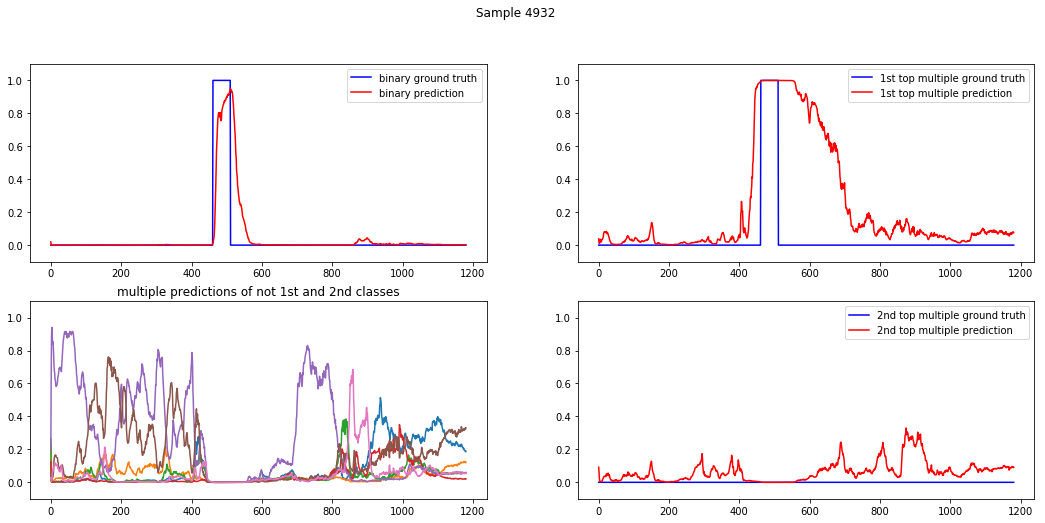

<Figure size 1296x576 with 0 Axes>

In [27]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_train, Yp_train, n_plot=4, ds_folder=None, delta=3000, idx_list=mt2['_tp'])

### False positives

Sample: 4419


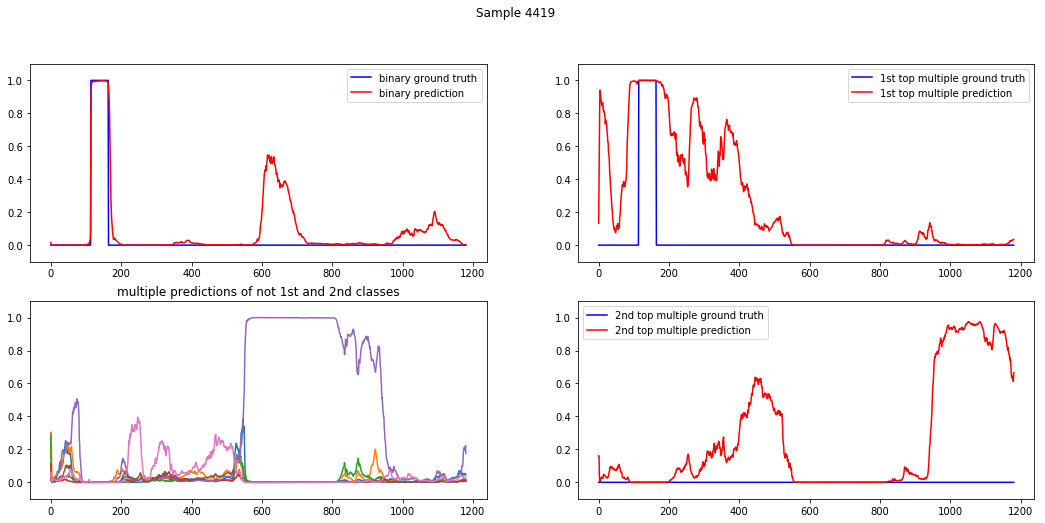

Sample: 4270


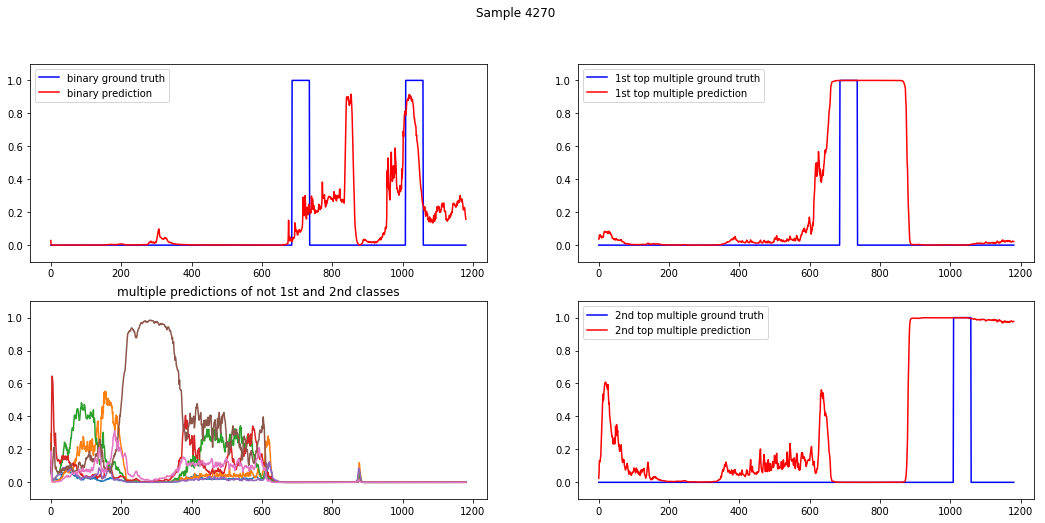

Sample: 4785


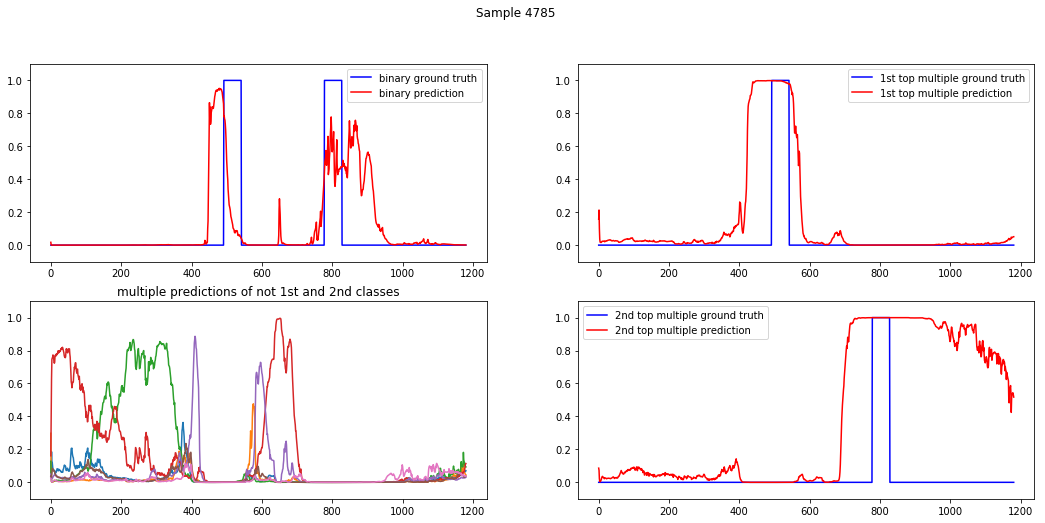

Sample: 929


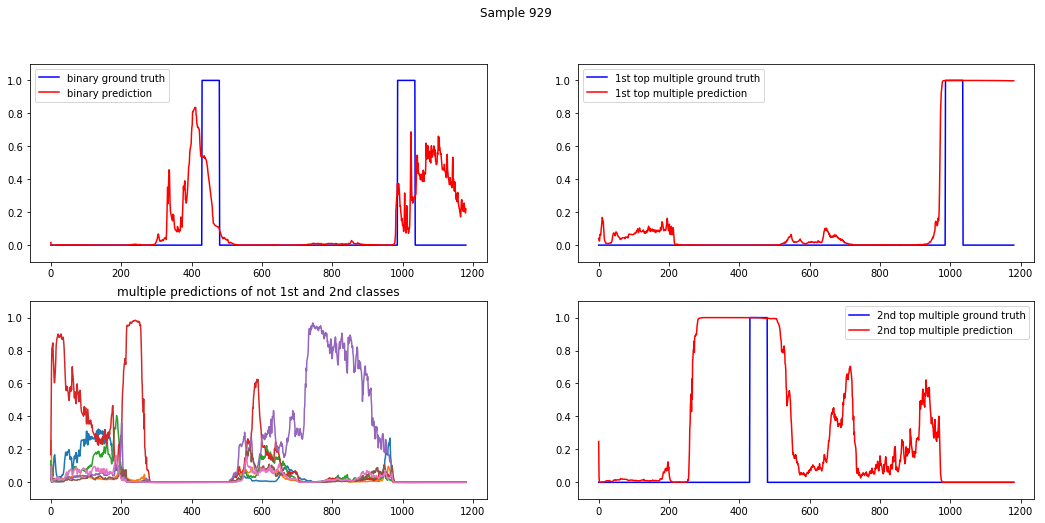

<Figure size 1296x576 with 0 Axes>

In [20]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_train, Yp_train, n_plot=4, ds_folder=None, delta=3000, idx_list=mt2['_fpb'])

### False negatives

Sample: 5892


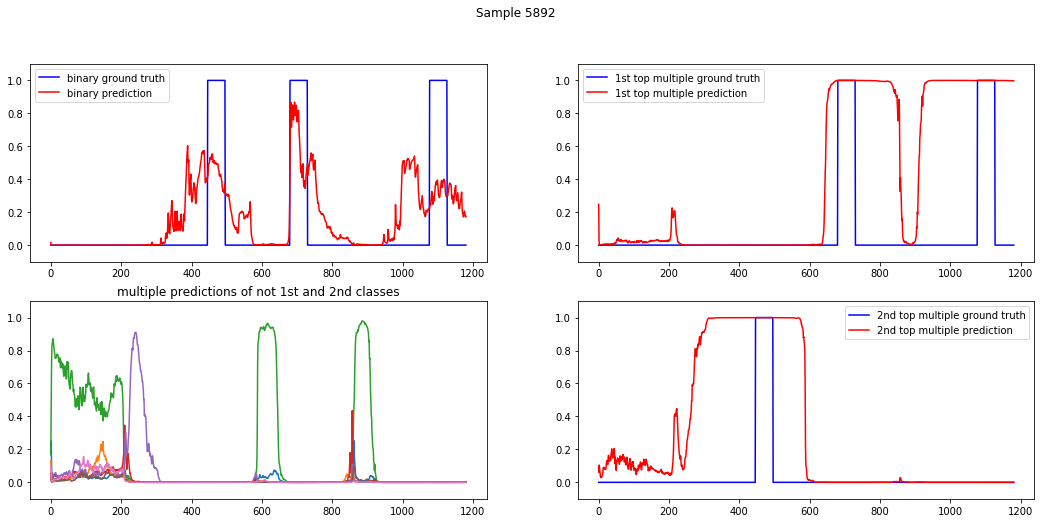

Sample: 6705


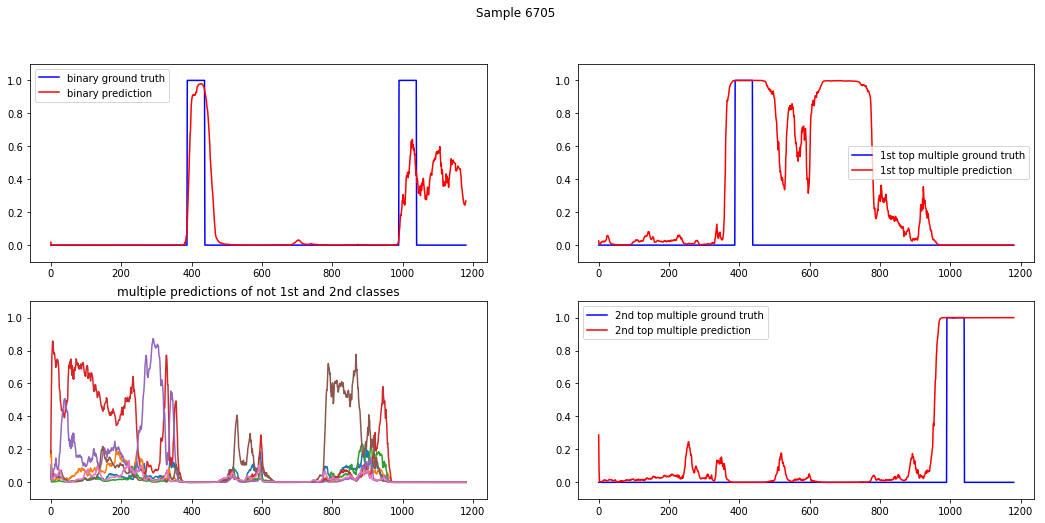

Sample: 3411


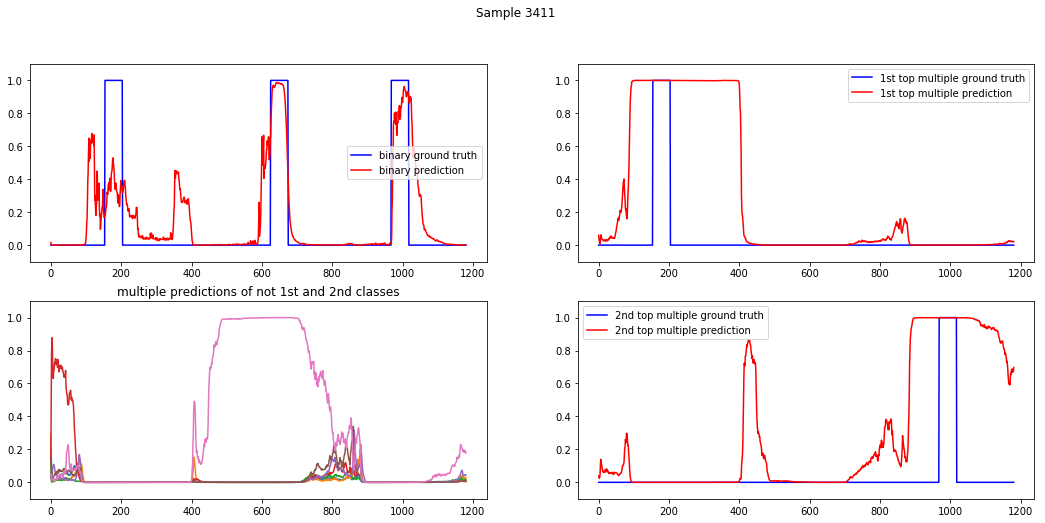

Sample: 5025


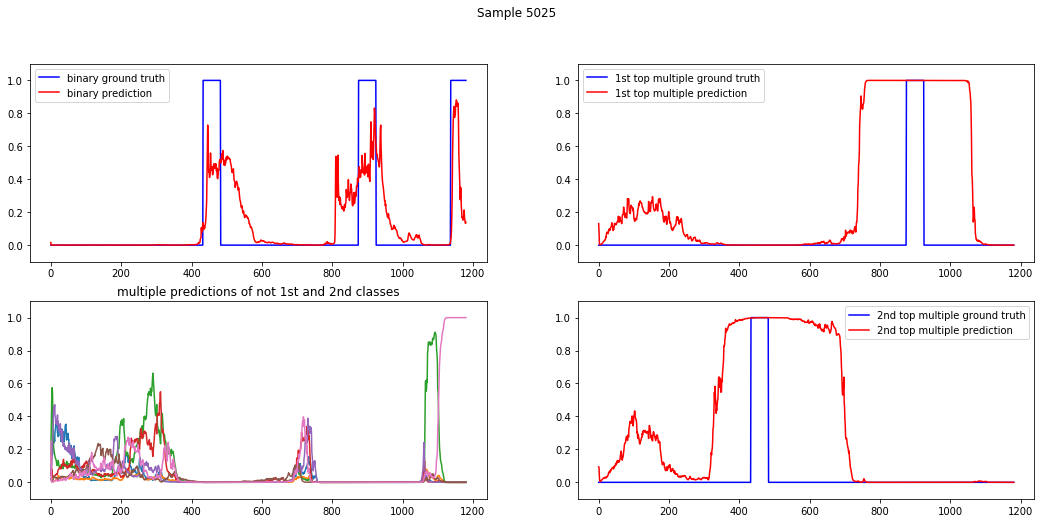

<Figure size 1296x576 with 0 Axes>

In [21]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_train, Yp_train, n_plot=4, ds_folder=None, delta=3000, idx_list=mt2['_fnb'])

### Wrong class

Sample: 3678


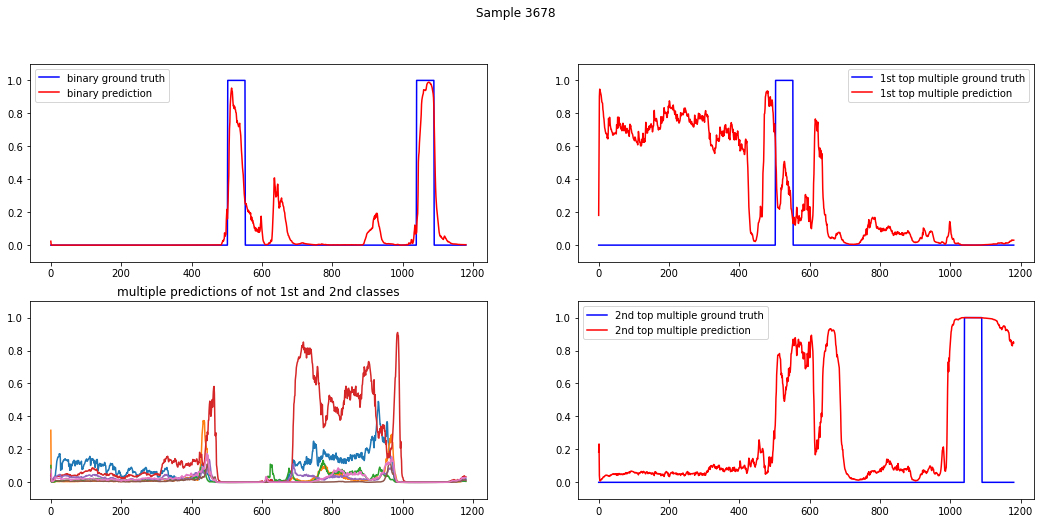

Sample: 986


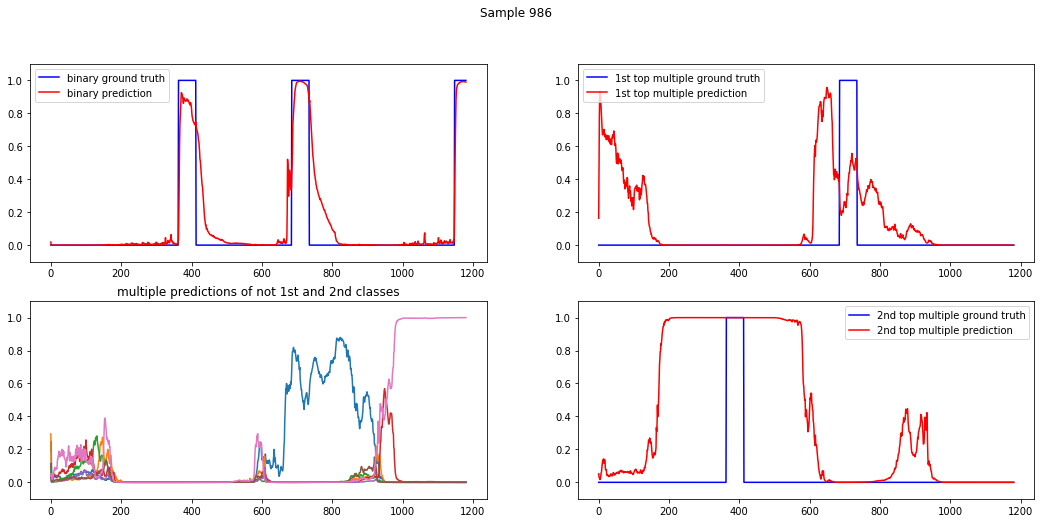

Sample: 2289


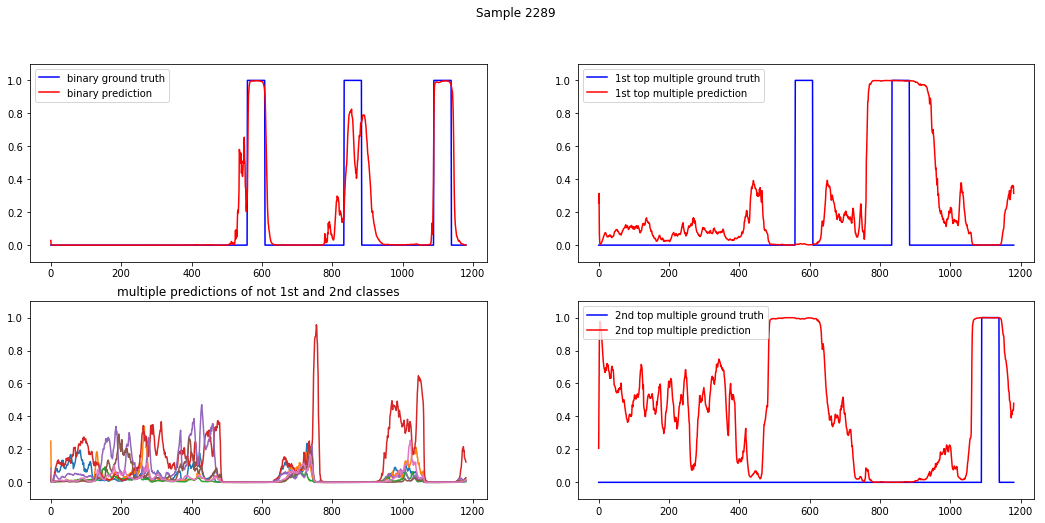

Sample: 986


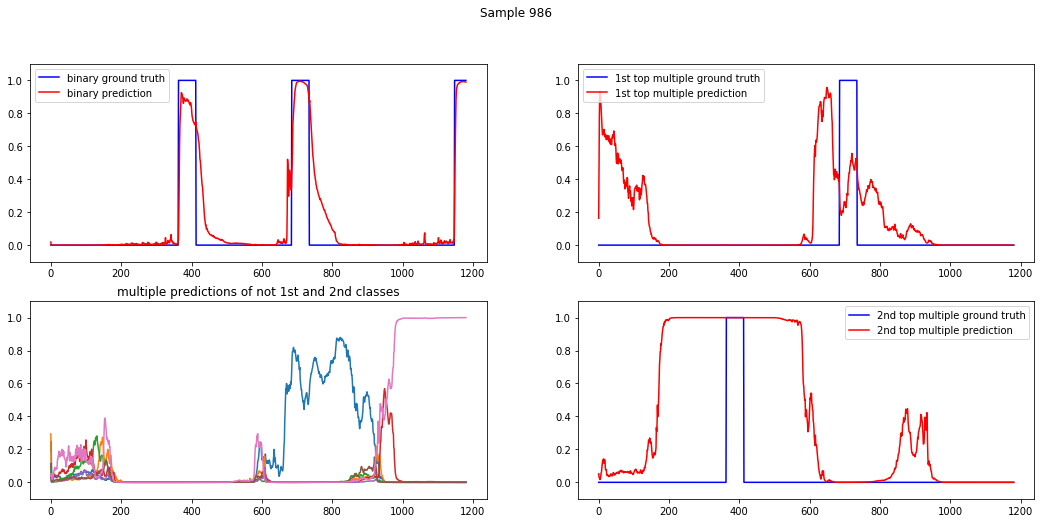

<Figure size 1296x576 with 0 Axes>

In [22]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_train, Yp_train, n_plot=4, ds_folder=None, delta=3000, idx_list=mt2['_fc'])

## Plotting random samples from validation set

### True positives

Sample: 340


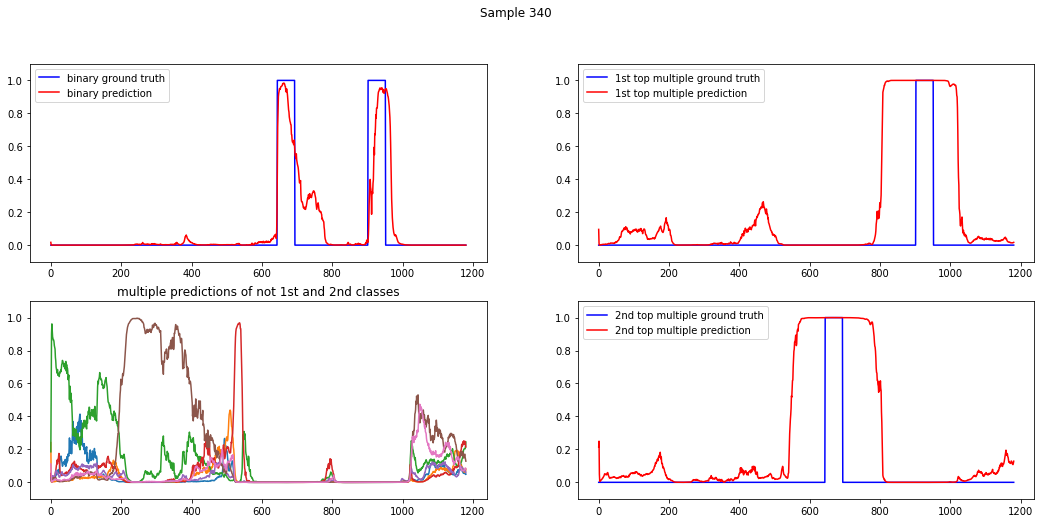

Sample: 1044


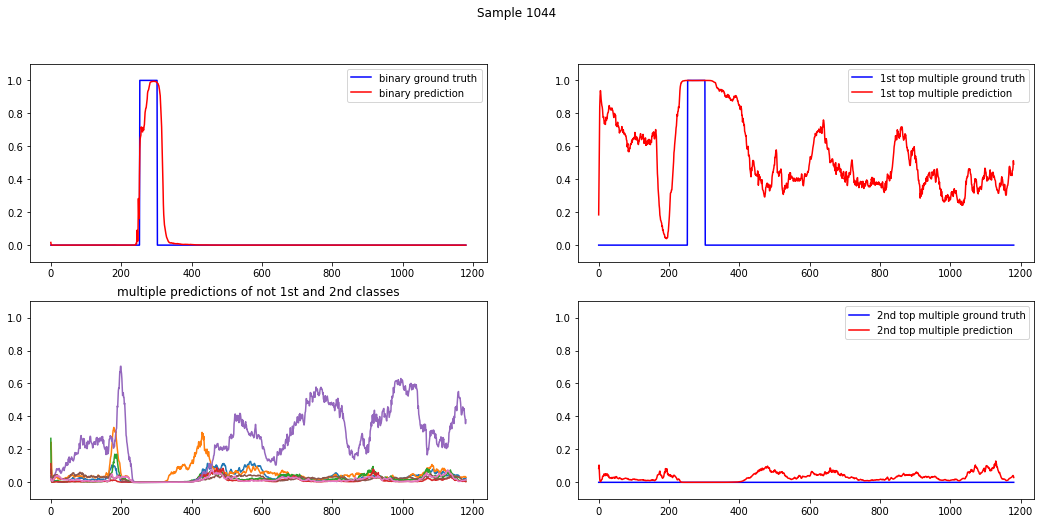

Sample: 100


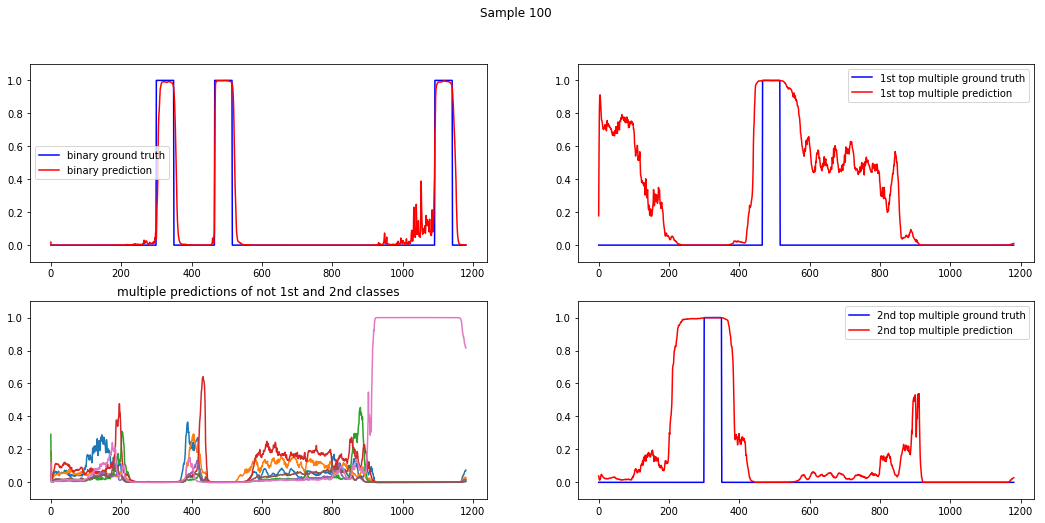

Sample: 800


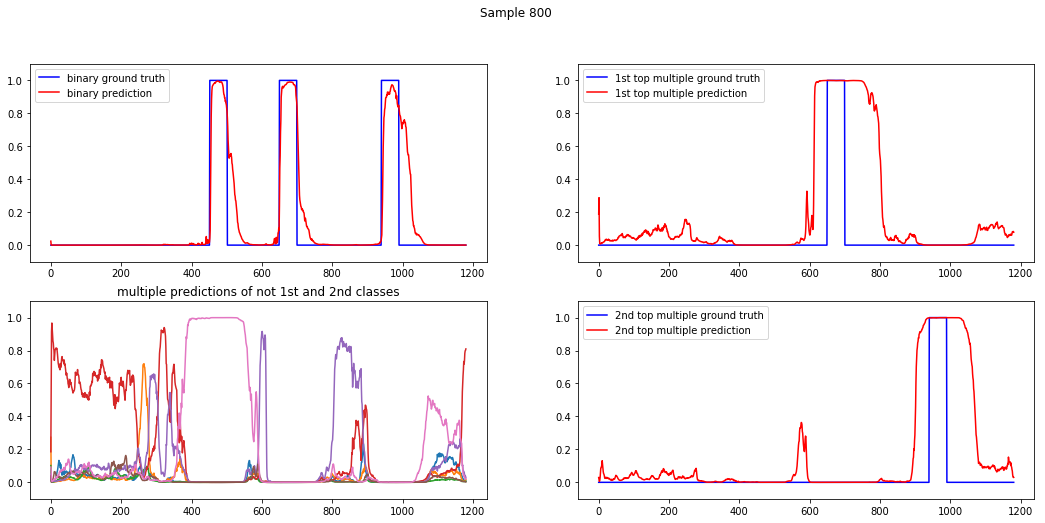

<Figure size 1296x576 with 0 Axes>

In [23]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_dev, Yp_dev, n_plot=4, ds_folder=None, delta=0, idx_list=md2['_tp'])

### False positives

Sample: 1368


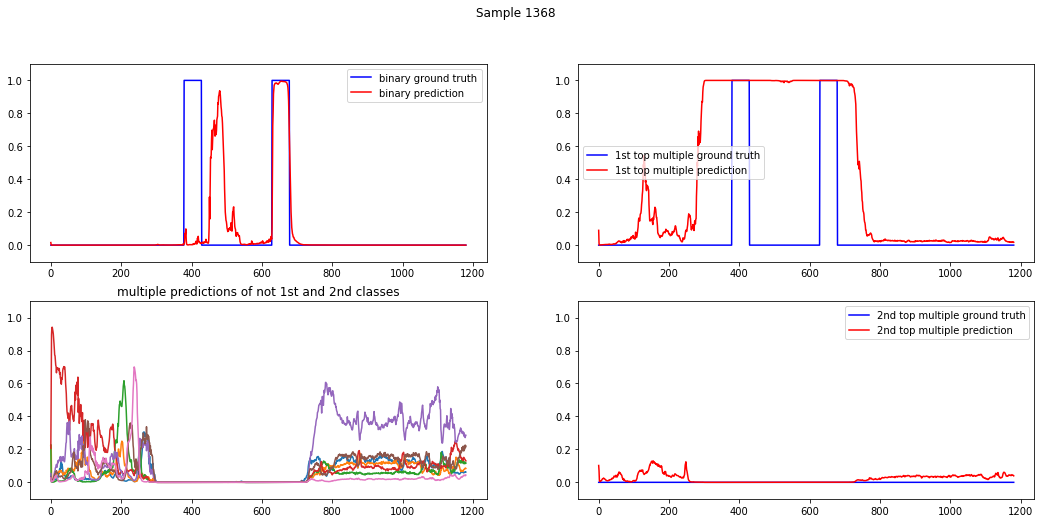

Sample: 480


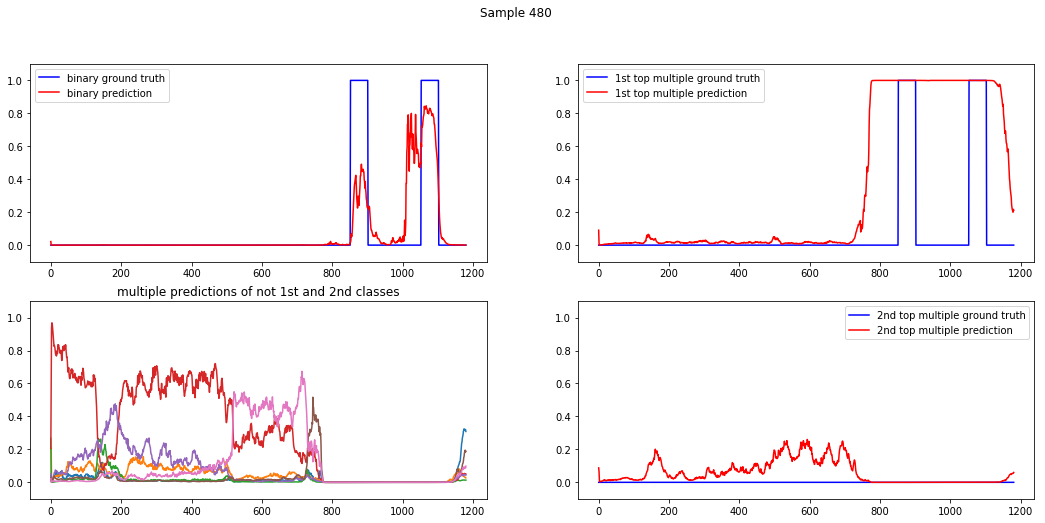

Sample: 115


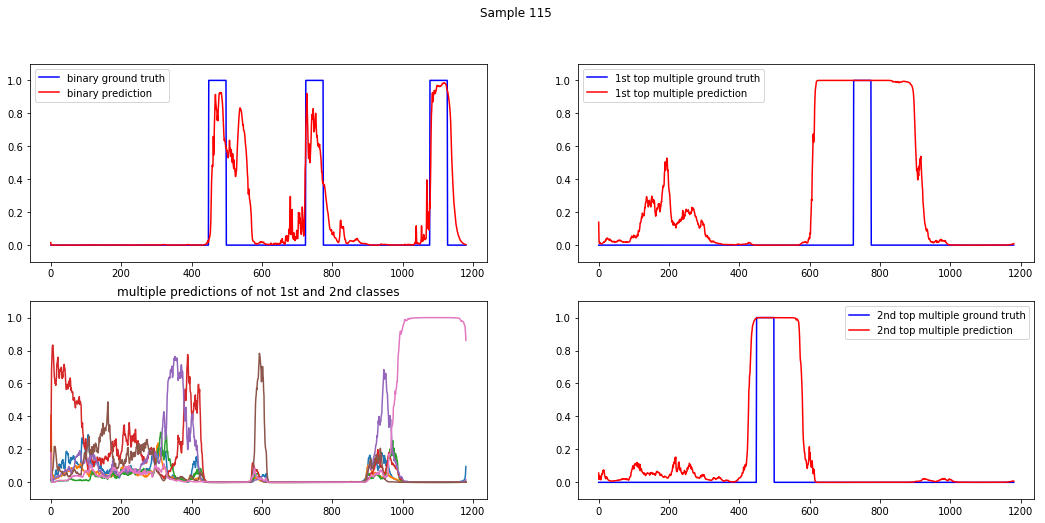

Sample: 1260


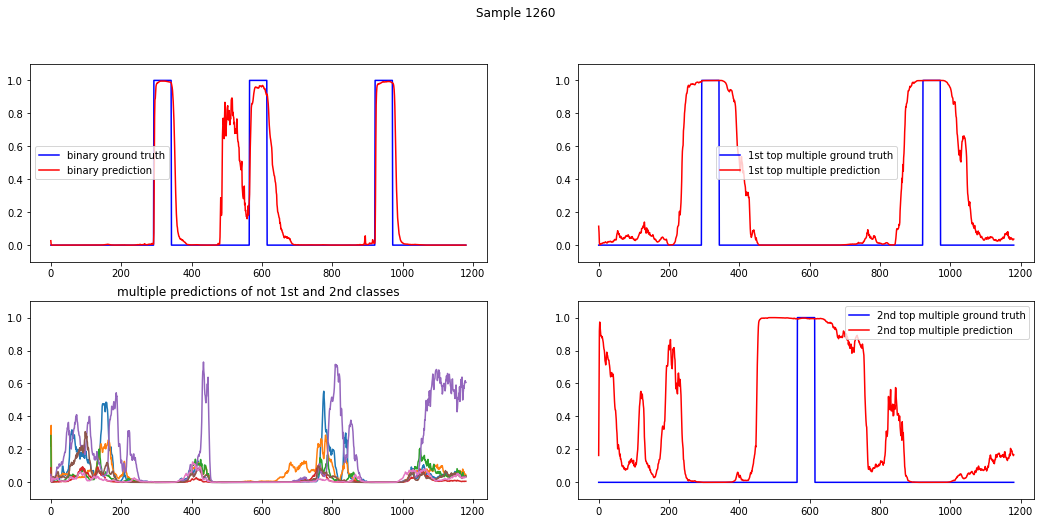

<Figure size 1296x576 with 0 Axes>

In [24]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_dev, Yp_dev, n_plot=4, ds_folder=None, delta=0, idx_list=md2['_fpb'])

### False negatives

Sample: 197


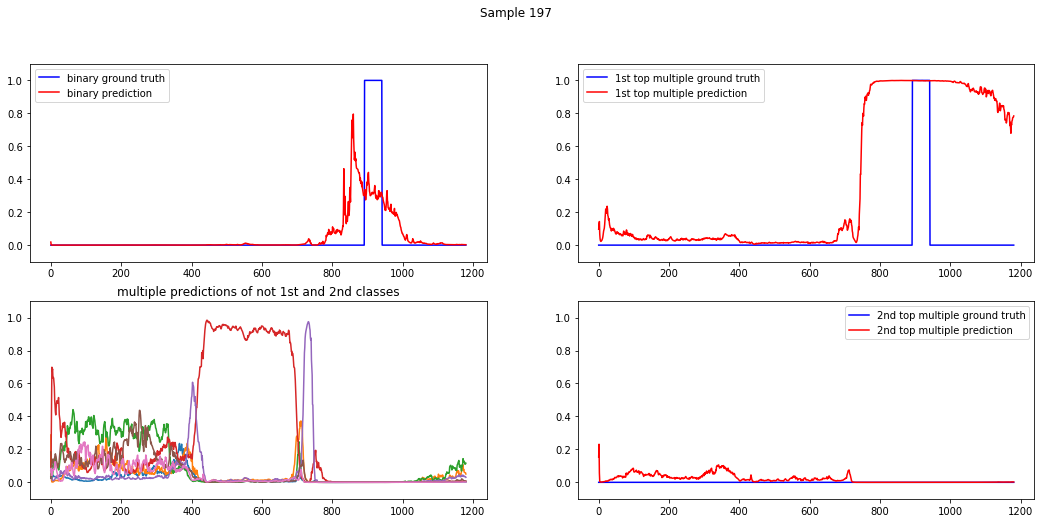

Sample: 1364


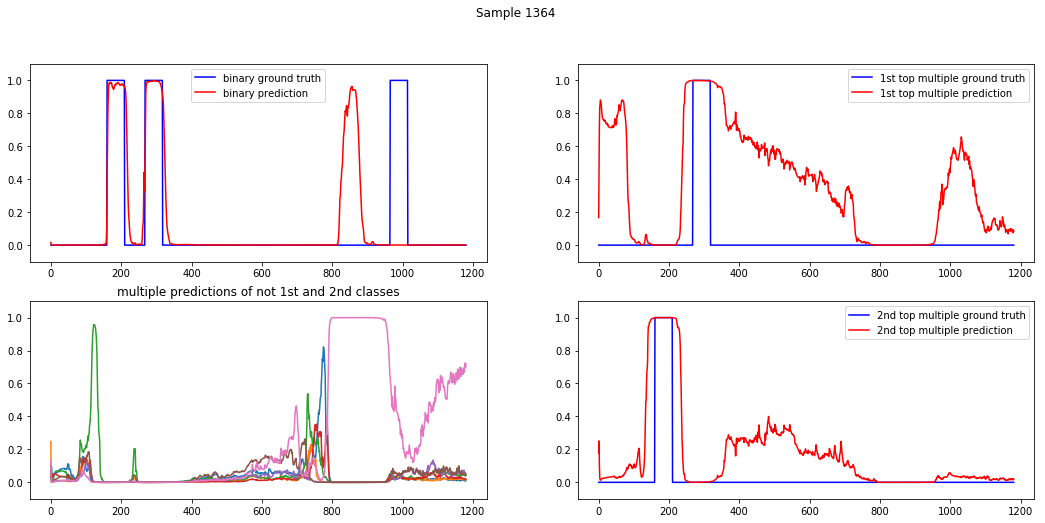

Sample: 289


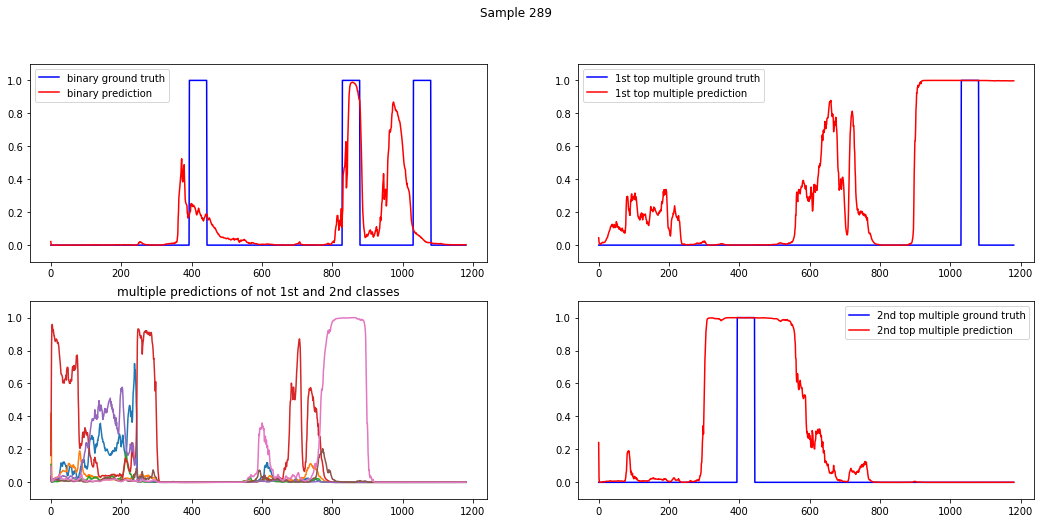

Sample: 487


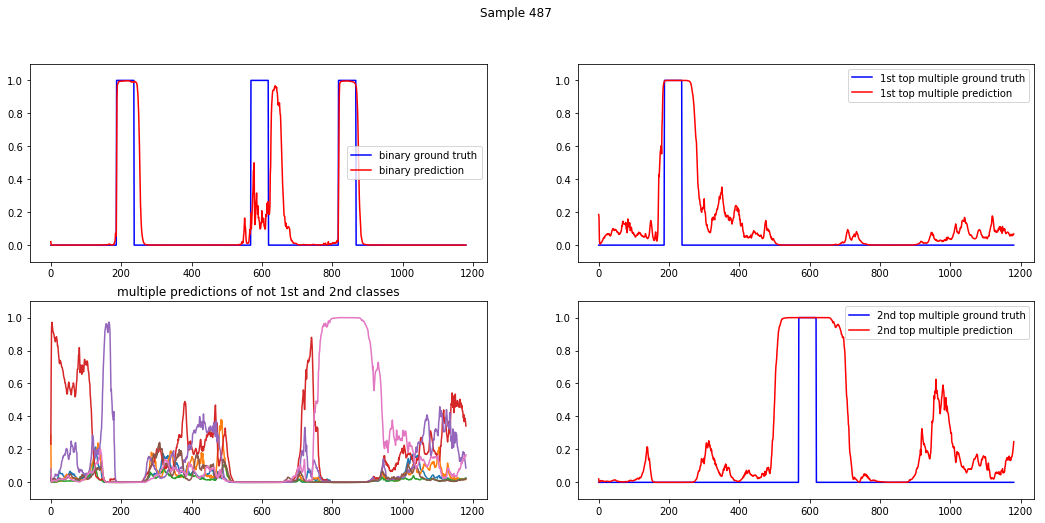

<Figure size 1296x576 with 0 Axes>

In [25]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_dev, Yp_dev, n_plot=4, ds_folder=None, delta=0, idx_list=md2['_fnb'])

### Wrong class

Sample: 602


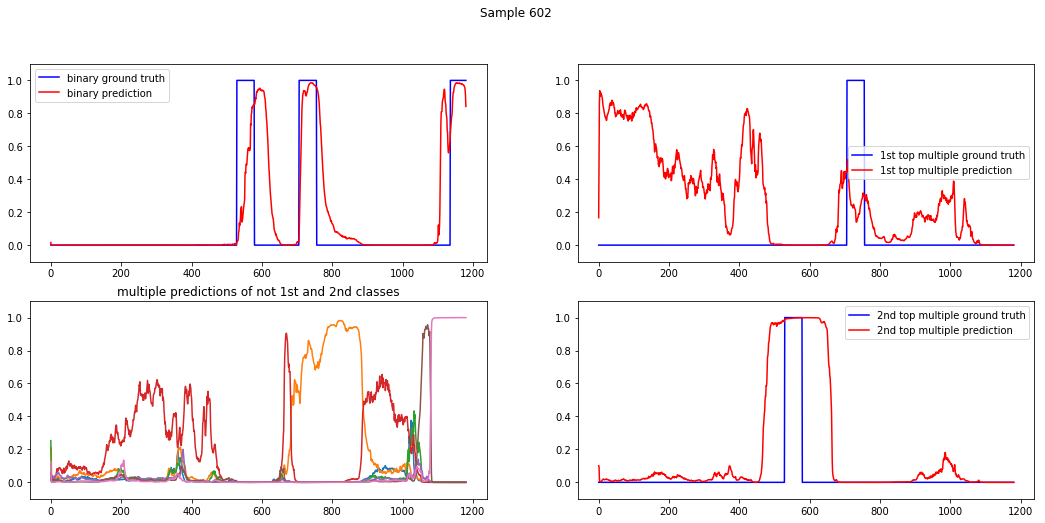

Sample: 1273


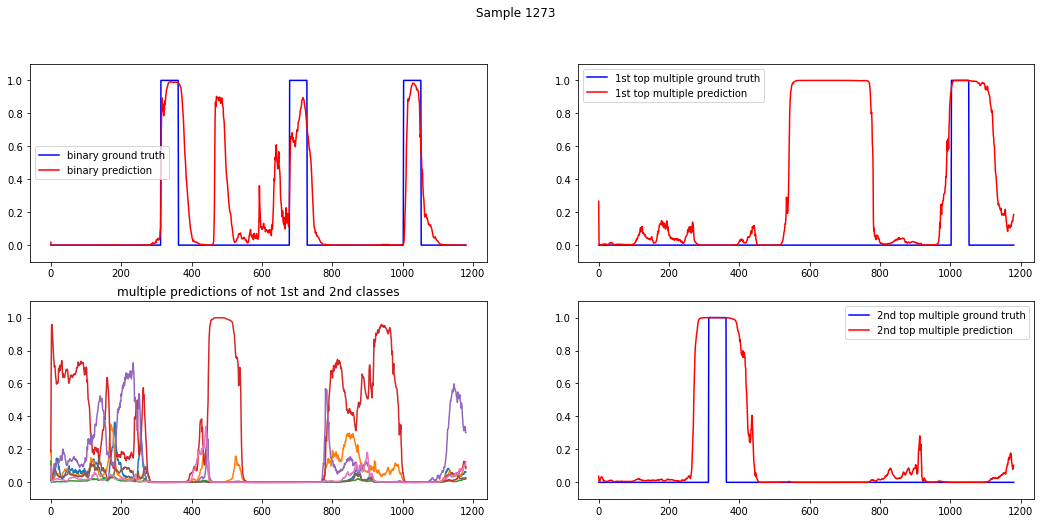

Sample: 598


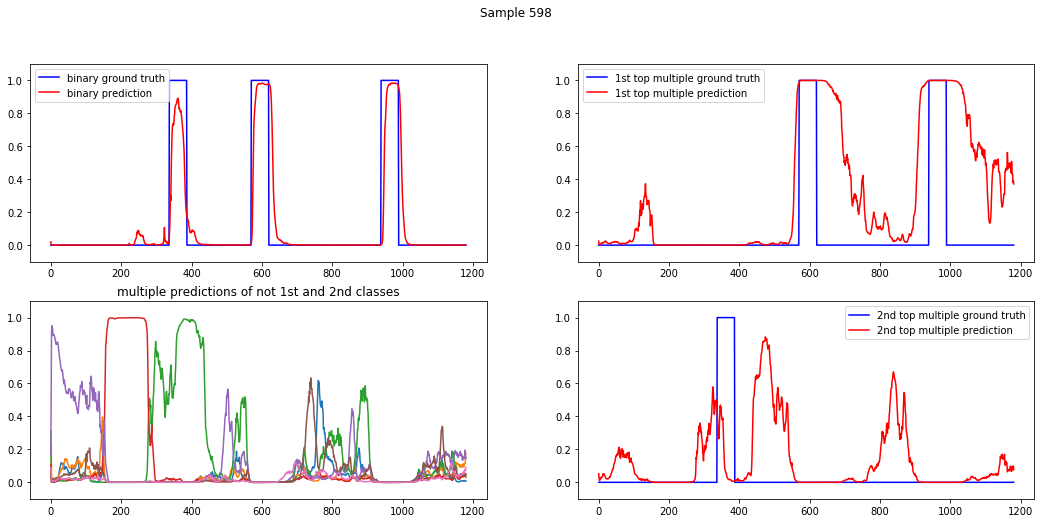

Sample: 813


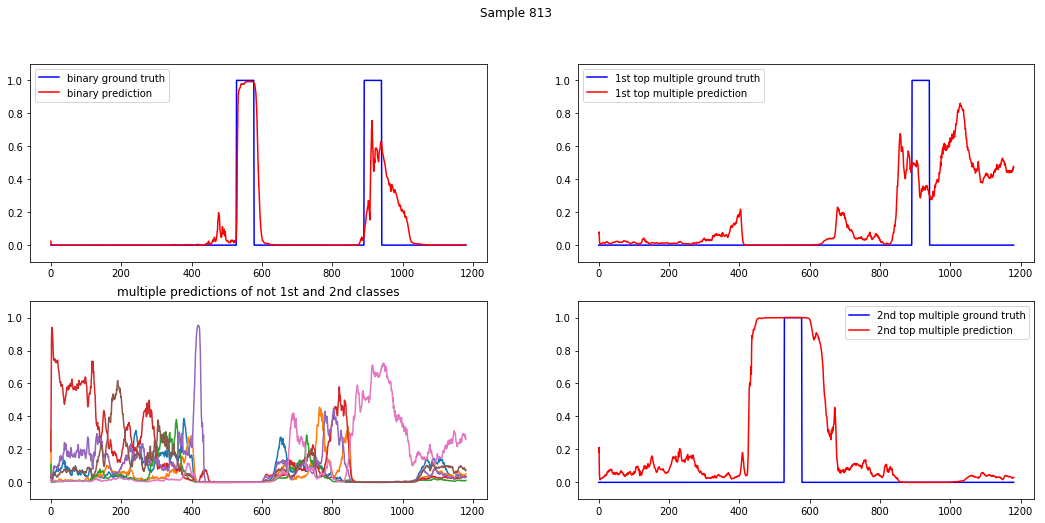

<Figure size 1296x576 with 0 Axes>

In [26]:
plt.rcParams["figure.figsize"] =(18,8)
utt.evaluate_plot_multi(Y_dev, Yp_dev, n_plot=4, ds_folder=None, delta=0, idx_list=md2['_fc'])

## Test for prediction with a variable number of samples

In [5]:
ep = 2
model_live = um.load_model_for_live(model_folder,ep)

In [ ]:
y = model_live.predict(X_dev[:1,:19], batch_size=1)
print(y.shape)
print(X_dev[:1,:19].shape, X_dev.dtype)

In [ ]:
Yp_dev_live = model_live.predict(X_dev, batch_size=1)

In [ ]:
print("\nValidation set metrics")
m, _ = utt.compute_global_metrics_multi(Y_dev, Yp_dev_live)
print(m)

Predict on file
# peaks 1
Peaks:
(442, 457) 5


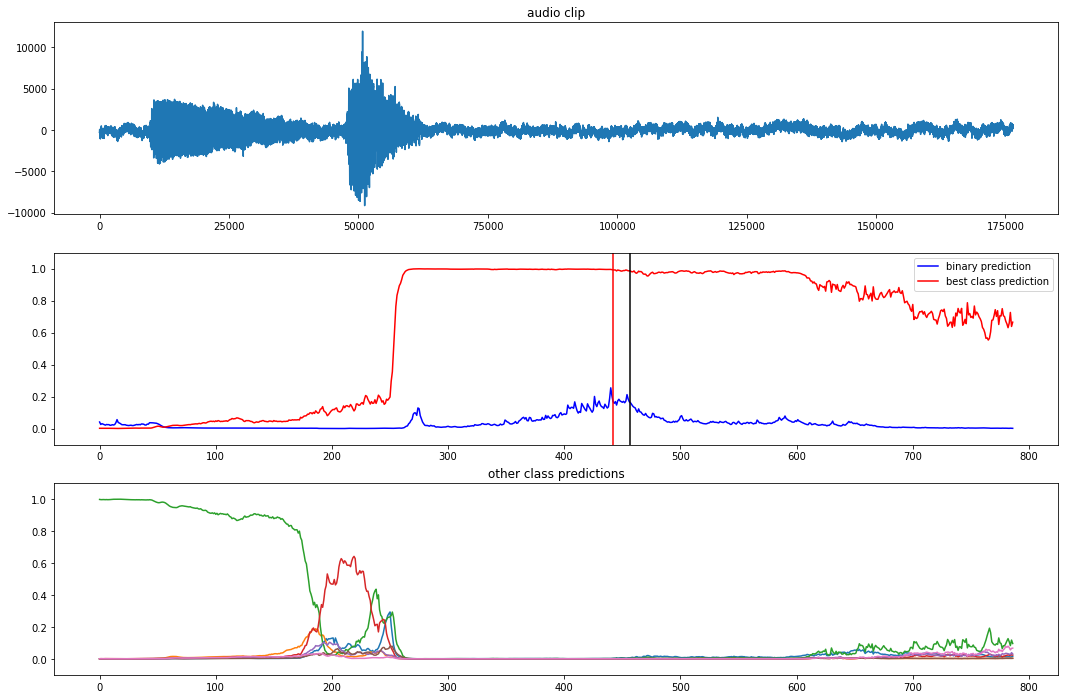

([(442, 457)], [5])

<Figure size 1296x864 with 0 Axes>

In [40]:
print("Predict on file")
plt.rcParams["figure.figsize"] =(18,12)
utt.predict_audio_clip_multi(model_live,"../temp/cmd000.wav",confidence_thres=0.15)